In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

## Spotify Song Attributes EDA

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [5]:
train, test =  train_test_split(df, test_size = .15)
print(f"Training size: {len(train)}; Testing size: {len(test)}")

Training size: 1714; Testing size: 303


In [6]:
# Created Variables and Indexed Likes/Dislikes based on various attributes
pos_tempo = df[df['target'] == 1]['tempo']
neg_tempo = df[df['target'] == 0]['tempo']
pos_dance = df[df['target'] == 1]['danceability']
neg_dance = df[df['target'] == 0]['danceability']
pos_duration = df[df['target'] == 1]['duration_ms']
neg_duration = df[df['target'] == 0]['duration_ms']
pos_energy = df[df['target'] == 1]['energy']
neg_energy = df[df['target'] == 0]['energy']
pos_loudness = df[df['target'] == 1]['loudness']
neg_loudness = df[df['target'] == 0]['loudness']
pos_speechiness = df[df['target'] == 1]['speechiness']
neg_speechiness = df[df['target'] == 0]['speechiness']
pos_valence = df[df['target'] == 1]['valence']
neg_valence = df[df['target'] == 0]['valence']
pos_acousticness = df[df['target'] == 1]['acousticness']
neg_acousticness = df[df['target'] == 0]['acousticness']
pos_key = df[df['target'] == 1]['key']
neg_key = df[df['target'] == 0]['key']
pos_instrumentalness = df[df['target'] == 1]['instrumentalness']
neg_instrumentalness = df[df['target'] == 0]['instrumentalness']

In [7]:
# Histogram Customization
green_red = ["#97E395", "#EB8282"]
color_scheme = sns.color_palette(green_red)
sns.set_palette(color_scheme)
sns.set_style("darkgrid")

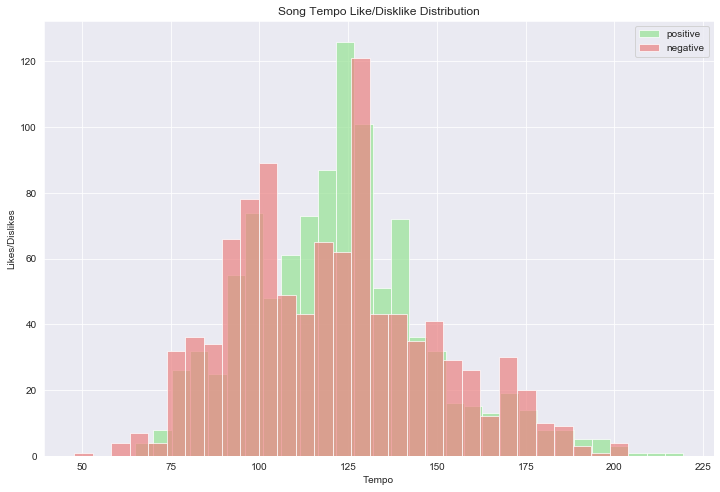

In [8]:
# Histogram Creation
fig = plt.figure(figsize= (12, 8))
plt.title("Song Tempo Like/Disklike Distribution")
pos_tempo.hist(alpha = .7, bins= 30, label='positive')
neg_tempo.hist(alpha = .7, bins= 30, label='negative')
plt.xlabel('Tempo')
plt.ylabel('Likes/Dislikes')
plt.legend(loc = "upper right")

Text(0.5, 1.0, 'Song Instrumentalness Like/Dislike Distribution')

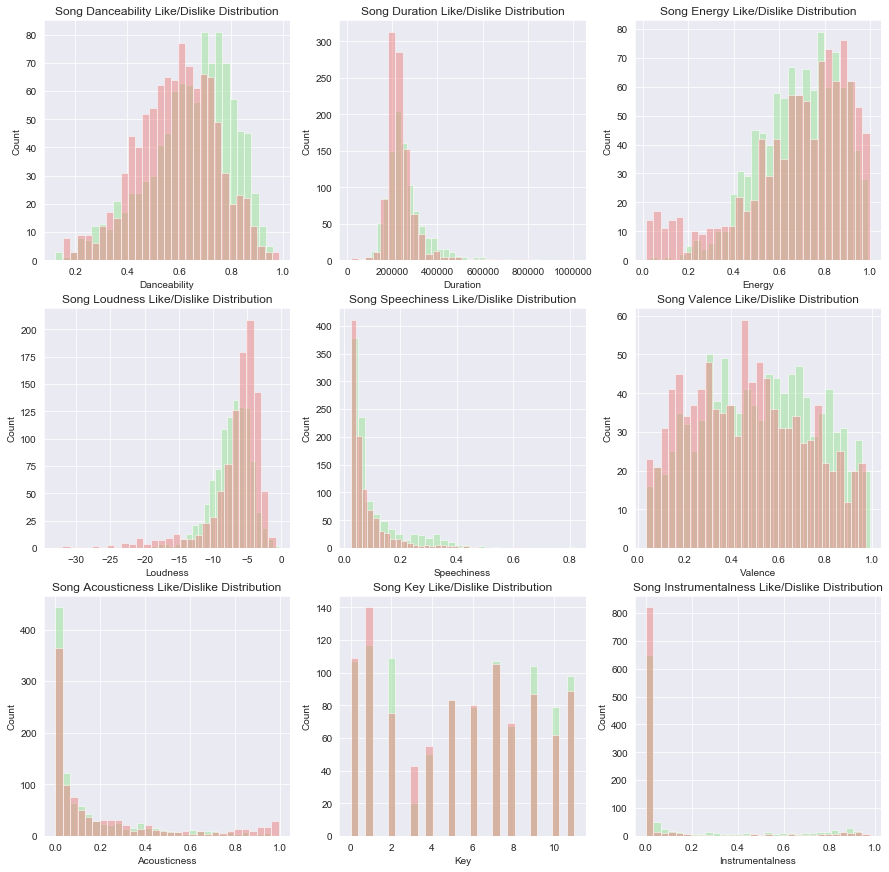

In [9]:
# Subplots (9 Histograms in One Visualization)
# RED = Negative (Dislike)
# GREEN = Positive (Like) 
sub_fig, axs = plt.subplots(3,3,figsize =(15,15))

# Danceability
axs[0,0].hist(pos_dance, alpha= .5, bins= 30)
axs[0,0].hist(neg_dance, alpha= .5, bins= 30)
axs[0,0].set_xlabel('Danceability')
axs[0,0].set_ylabel('Count')
axs[0,0].set_title('Song Danceability Like/Dislike Distribution')


# Duration
axs[0,1].hist(pos_duration, alpha= .5, bins= 30)
axs[0,1].hist(neg_duration, alpha= .5, bins= 30)
axs[0,1].set_xlabel('Duration')
axs[0,1].set_ylabel('Count')
axs[0,1].set_title('Song Duration Like/Dislike Distribution')

# Energy
axs[0,2].hist(pos_energy, alpha= .5, bins= 30)
axs[0,2].hist(neg_energy, alpha= .5, bins= 30)
axs[0,2].set_xlabel('Energy')
axs[0,2].set_ylabel('Count')
axs[0,2].set_title('Song Energy Like/Dislike Distribution')

# Loudness
axs[1,0].hist(pos_loudness, alpha= .5, bins= 30)
axs[1,0].hist(neg_loudness, alpha= .5, bins= 30)
axs[1,0].set_xlabel('Loudness')
axs[1,0].set_ylabel('Count')
axs[1,0].set_title('Song Loudness Like/Dislike Distribution')

# Speechiness
axs[1,1].hist(pos_speechiness, alpha= .5, bins= 30)
axs[1,1].hist(neg_speechiness, alpha= .5, bins= 30)
axs[1,1].set_xlabel('Speechiness')
axs[1,1].set_ylabel('Count')
axs[1,1].set_title('Song Speechiness Like/Dislike Distribution')

# Valence
axs[1,2].hist(pos_valence, alpha= .5, bins= 30)
axs[1,2].hist(neg_valence, alpha= .5, bins= 30)
axs[1,2].set_xlabel('Valence')
axs[1,2].set_ylabel('Count')
axs[1,2].set_title('Song Valence Like/Dislike Distribution')

# Acousticness
axs[2,0].hist(pos_acousticness, alpha= .5, bins= 30)
axs[2,0].hist(neg_acousticness, alpha= .5, bins= 30)
axs[2,0].set_xlabel('Acousticness')
axs[2,0].set_ylabel('Count')
axs[2,0].set_title('Song Acousticness Like/Dislike Distribution')

# Key
axs[2,1].hist(pos_key, alpha= .5, bins= 30)
axs[2,1].hist(neg_key, alpha= .5, bins= 30)
axs[2,1].set_xlabel('Key')
axs[2,1].set_ylabel('Count')
axs[2,1].set_title('Song Key Like/Dislike Distribution')

# Instrumentalness
axs[2,2].hist(pos_instrumentalness, alpha= .5, bins= 30)
axs[2,2].hist(neg_instrumentalness, alpha= .5, bins= 30)
axs[2,2].set_xlabel('Instrumentalness')
axs[2,2].set_ylabel('Count')
axs[2,2].set_title('Song Instrumentalness Like/Dislike Distribution')


## Decision Tree Creation

In [16]:
DTC = DecisionTreeClassifier(min_samples_split = 150)

In [17]:
features = ["danceability","loudness", "valence", "speechiness", "key", "instrumentalness", "acousticness", "duration_ms", "energy"]

In [18]:
# Training Set
x_train = train[features]
y_train = train["target"]

# Testing Set
x_test = test[features]
y_test = test["target"]

In [19]:
dt = DTC.fit(x_train, y_train)

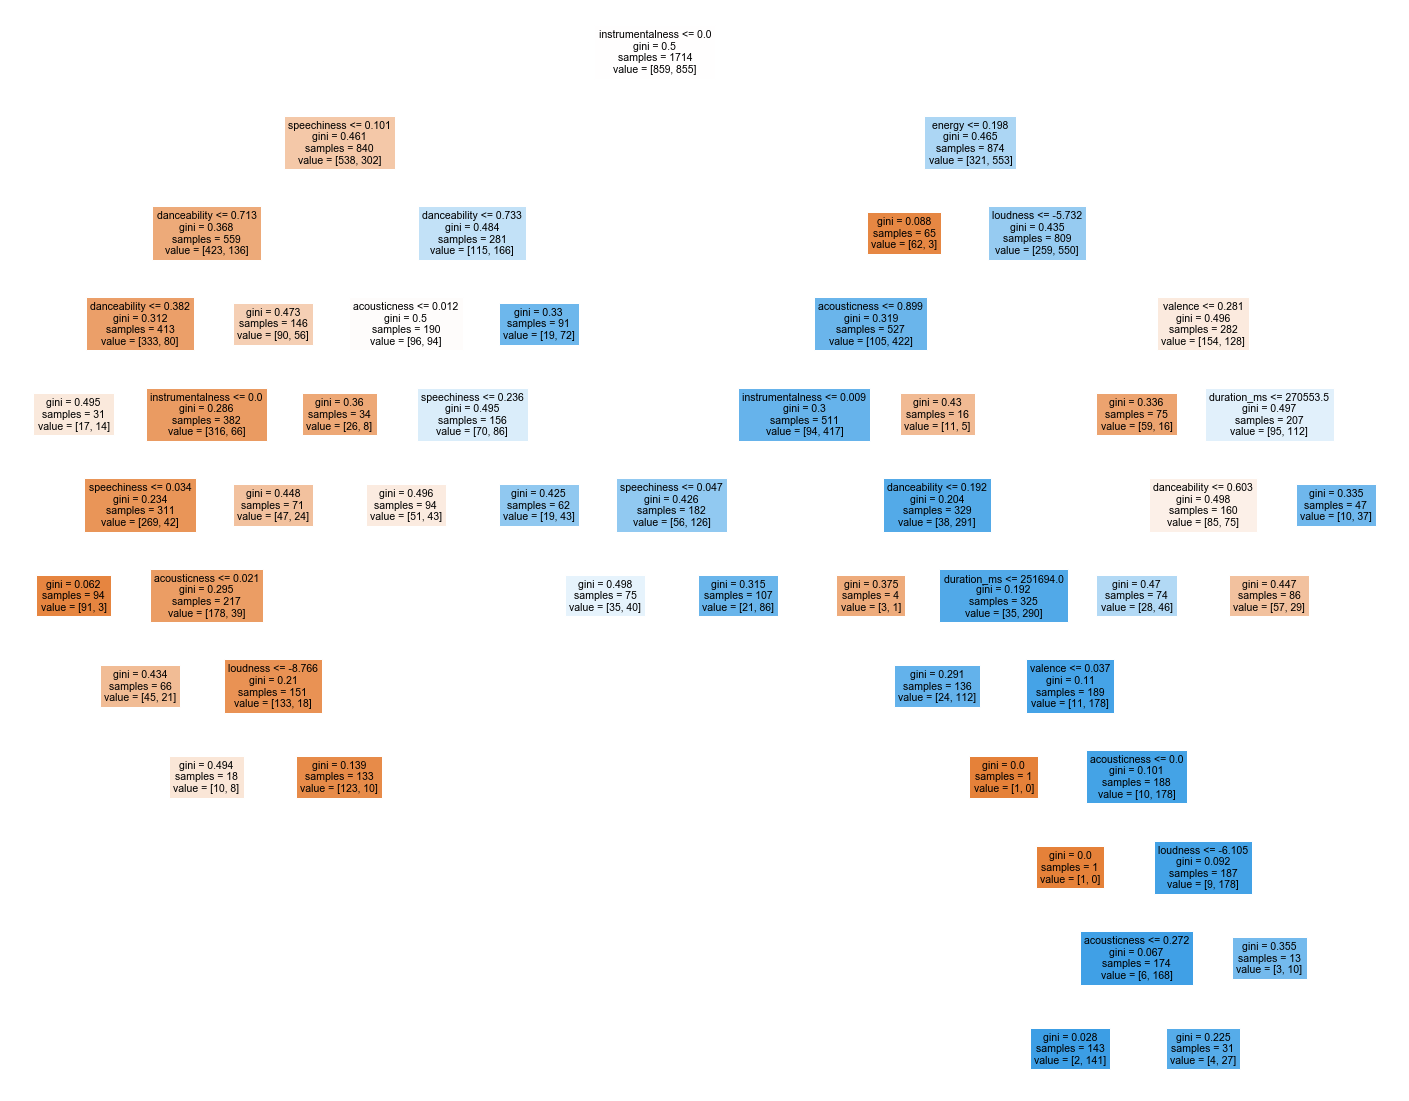

In [20]:
# Decision Tree Visual
mpl.rcParams['text.color'] = 'black'
dt_fig = plt.figure(figsize=(25,20))
tree_plot = tree.plot_tree(DTC, feature_names = features, filled=True)
dt_fig.savefig("decision_tree.png")

In [21]:
# Running the testing set with the trained decision tree
y_pred = DTC.predict(x_test)

In [24]:
# Obtain Accuracy of the predictions of the test set using the training set decision tree.

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy using Decision Tree: {round(score,1)}%")

Accuracy using Decision Tree: 74.9%


Note: As the number of minimum splits is decreased, so is the accuracy of our model.
    if min_split_samples = 2, then accuracy drops to 70.3%
    for min_split_variables, please refer to the first cell in the "Decision Tree Creation" Section.